**Task-1:** Implement the histogram equalization algorithm from scratch and apply it on the attached images. Show the original and the output images along with their histograms, PMFs, and CDFs.

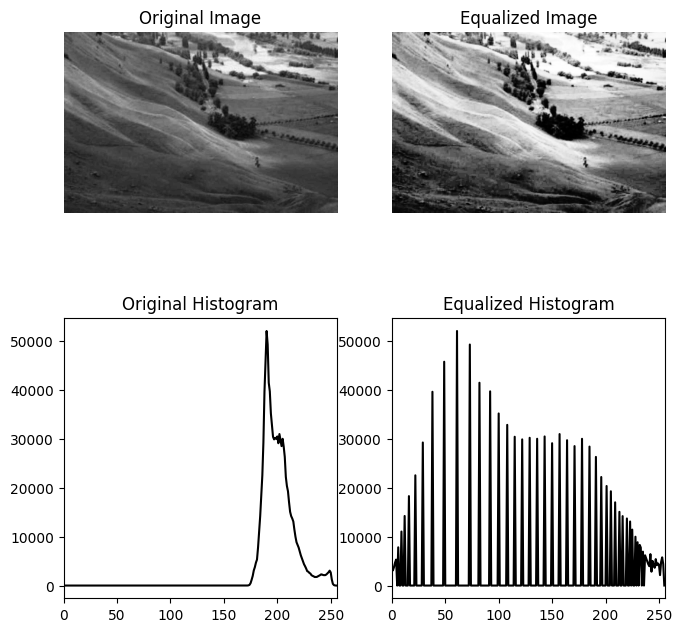

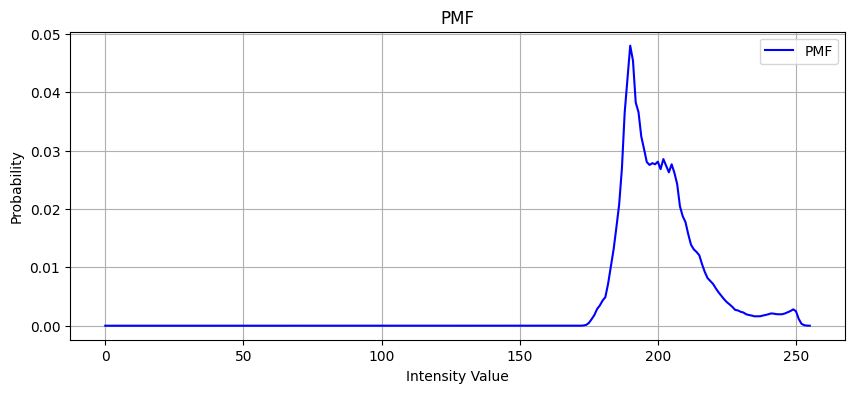

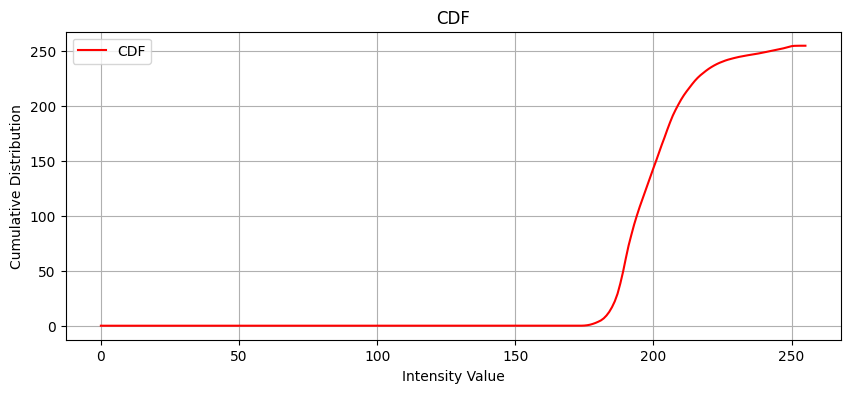

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Flatten the image array and calculate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate PMF (Probability Mass Function)
    total_pixels = image.size
    pmf = hist / total_pixels
    
    # Calculate CDF (Cumulative Distribution Function)
    cdf = pmf.cumsum()
    
    # Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    
    # Use the normalized CDF to map the pixel values
    equalized_image = cdf_normalized[image].astype(np.uint8)
    
    return equalized_image, hist, pmf, cdf, cdf_normalized

def plot_results(original_image, equalized_image, original_hist, equalized_hist, pmf, cdf, cdf_normalized):
    # Plot original and equalized images
    plt.figure(figsize=(12, 8))
    
    # Original Image
    plt.subplot(2, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Equalized Image
    plt.subplot(2, 3, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')
    
    # Original Histogram
    plt.subplot(2, 3, 4)
    plt.plot(original_hist, color='black')
    plt.title('Original Histogram')
    plt.xlim([0, 256])
    
    # Equalized Histogram
    plt.subplot(2, 3, 5)
    plt.plot(equalized_hist, color='black')
    plt.title('Equalized Histogram')
    plt.xlim([0, 256])
    
    # PMF
    plt.figure(figsize=(10, 4))
    plt.plot(pmf, color='blue', label='PMF')
    plt.title('PMF')
    plt.xlabel('Intensity Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # CDF
    plt.figure(figsize=(10, 4))
    plt.plot(cdf_normalized, color='red', label='CDF')
    plt.title('CDF')
    plt.xlabel('Intensity Value')
    plt.ylabel('Cumulative Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load image
image_path = 'Image-1.jpg'  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image, original_hist, pmf, cdf, cdf_normalized = histogram_equalization(original_image)

# Calculate equalized histogram
equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

# Plot the results
plot_results(original_image, equalized_image, original_hist, equalized_hist, pmf, cdf, cdf_normalized)


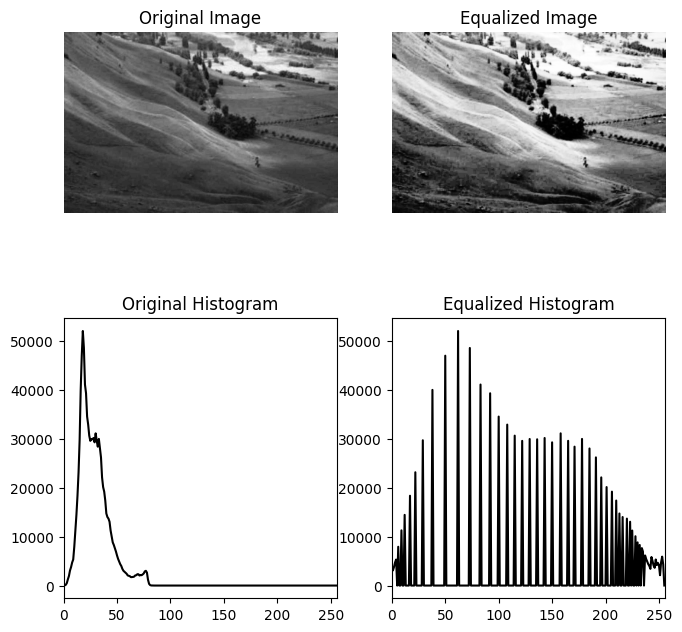

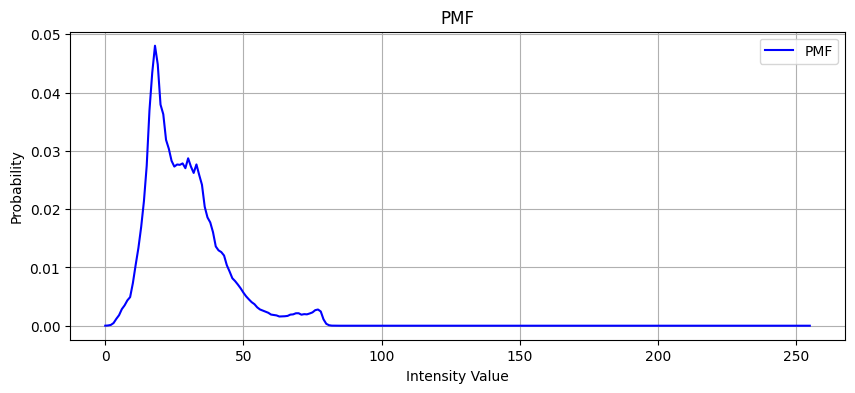

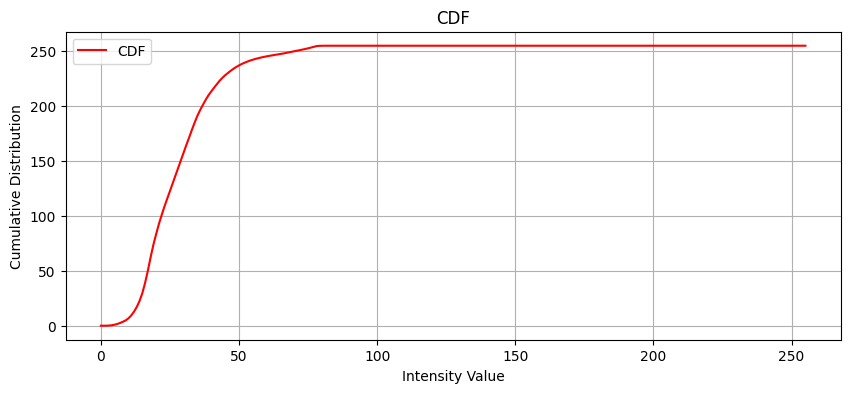

In [11]:
# Load image
image_path = 'Image-2.jpg'  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image, original_hist, pmf, cdf, cdf_normalized = histogram_equalization(original_image)

# Calculate equalized histogram
equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

# Plot the results
plot_results(original_image, equalized_image, original_hist, equalized_hist, pmf, cdf, cdf_normalized)

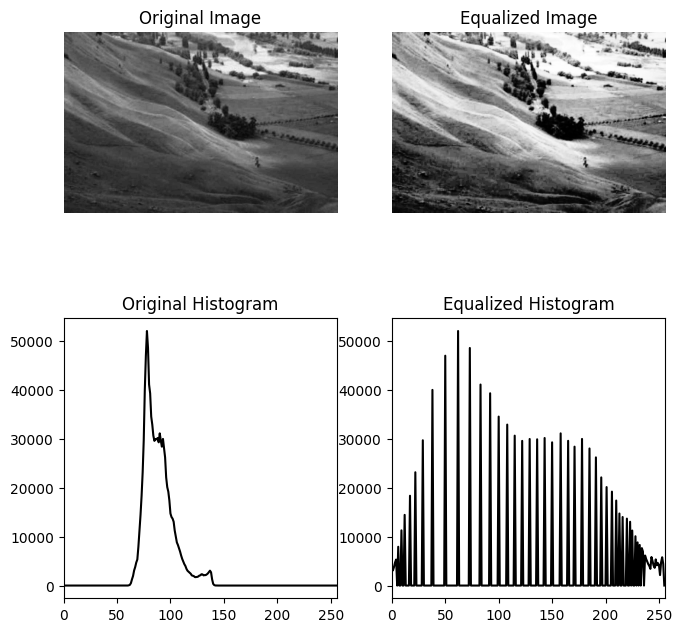

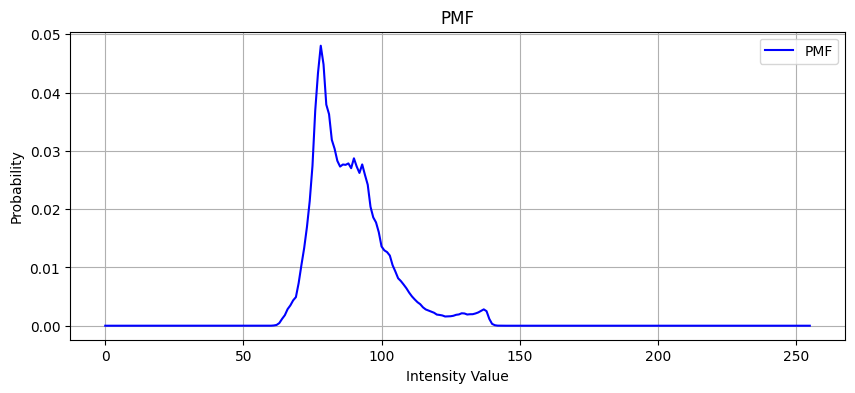

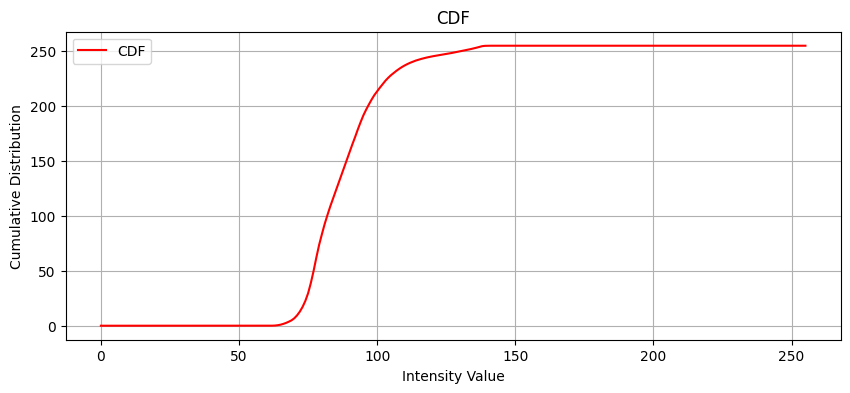

In [12]:
# Load image
image_path = 'Image-3.jpg'  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image, original_hist, pmf, cdf, cdf_normalized = histogram_equalization(original_image)

# Calculate equalized histogram
equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

# Plot the results
plot_results(original_image, equalized_image, original_hist, equalized_hist, pmf, cdf, cdf_normalized)

**Task-2**: Analyze the three output images and briefly discuss the similarities or differences in these output images

#### **Analysis of Histogram Equalization Results**

After applying histogram equalization to three images (dark, light, and mid), the resulting histograms of all three images are exactly the same. This outcome can be explained by the fact that:

1. **Identical Histogram Patterns**:
   - The histograms of the original images (before equalization) had the same overall pattern, but the pixel intensities were shifted along the grayscale axis:
     - **Dark Image**: The histogram was shifted towards the left (lower pixel intensities).
     - **Light Image**: The histogram was shifted towards the right (higher pixel intensities).
     - **Mid Image**: The histogram was centered in the middle (balanced pixel intensities).
   
2. **Effect of Histogram Equalization**:
   - Histogram equalization stretches the pixel intensities across the full grayscale range (0-255) based on the cumulative distribution function (CDF).
   - Since the original images had the same histogram pattern, albeit shifted, the equalization process results in the same transformation for each image.
   - This leads to all three images having the same equalized histogram and appearance after equalization.

#### **Conclusion:**
The reason for the identical equalized histograms is that the original histograms of the images were identical in shape, differing only in their position on the grayscale axis. Histogram equalization redistributes pixel intensities uniformly, so the same pattern across all images results in the same equalized output for each.


**Task-3**: Do literature review on Histogram Matching (Specification). Understand the algorithm and implement it using any two images of the same resolution (other than the ones provided).

#### **Literature Review on Histogram Matching (Specification)**

Histogram Matching, also known as Histogram Specification, is a technique used in image processing to modify the intensity distribution of an image so that it matches the histogram of a reference image. Unlike histogram equalization, which spreads pixel intensities evenly, histogram matching adjusts the source image to have a specific distribution derived from the target image.

**Key Steps:**
1. **Compute Histograms**: Calculate the histograms for both the source and reference images.
2. **Compute CDF**: Obtain the cumulative distribution function (CDF) for both images.
3. **Intensity Mapping**: Map each pixel intensity in the source image to the corresponding value in the reference image based on their CDFs.
4. **Output Image**: The resulting image will have a similar intensity distribution as the reference.

**Applications:**
- Image enhancement
- Medical imaging normalization
- Data augmentation in machine learning
- Color transfer between images

Histogram matching provides control over image characteristics, making it useful for standardizing images taken under different conditions or by different sensors.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic images
def generate_synthetic_images(size=(256, 256)):
    # Create a gradient image (synthetic source)
    source_image = np.tile(np.linspace(0, 255, size[1]), (size[0], 1)).astype(np.uint8)

    # Create a target image with a specific histogram (synthetic target)
    # A bimodal histogram (peaks at both ends)
    target_image = np.zeros(size, dtype=np.uint8)
    target_image[:size[0] // 2, :] = 0  # Dark region
    target_image[size[0] // 2:, :] = 255  # Bright region

    return source_image, target_image

# Generate the images
source_image, target_image = generate_synthetic_images()

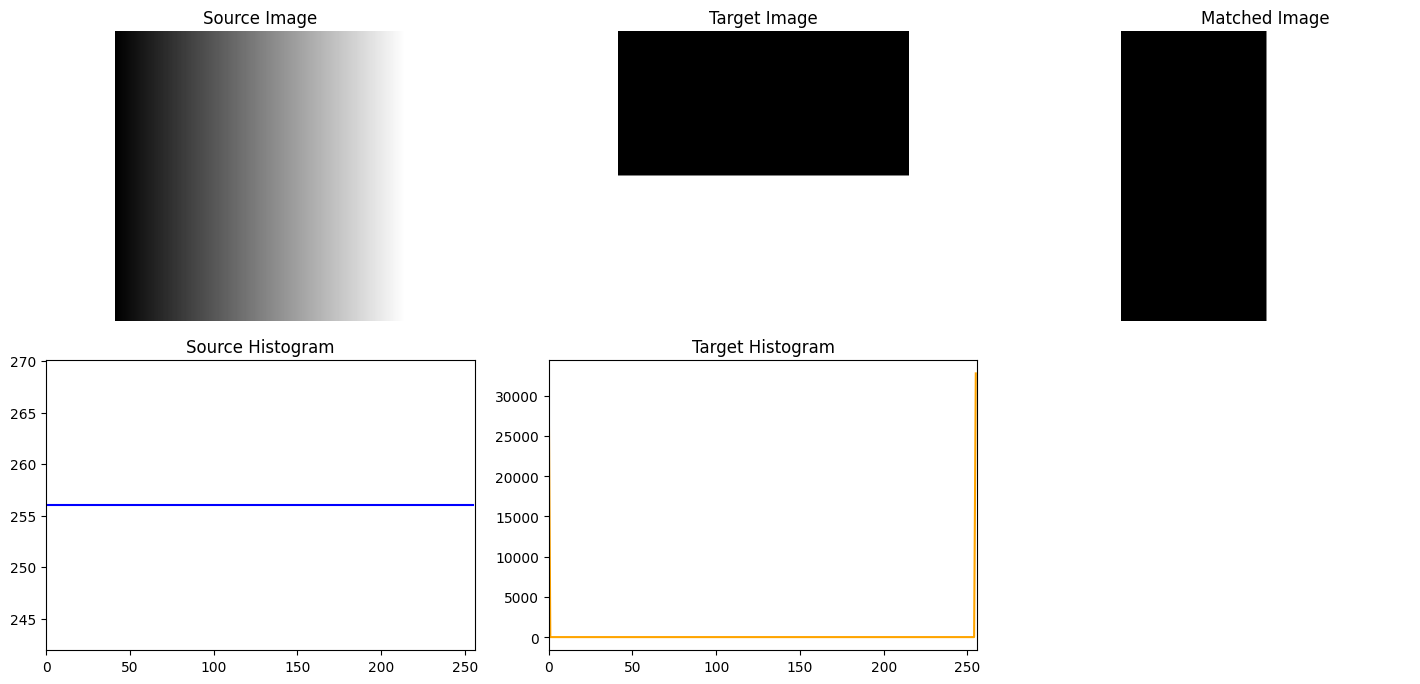

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_matching(source, target):
    # Flatten the images to 1D arrays
    source_flat = source.flatten()
    target_flat = target.flatten()
    
    # Calculate the histogram and CDF for the source image
    source_hist, bins = np.histogram(source_flat, bins=256, range=(0, 256))
    source_cdf = source_hist.cumsum()
    source_cdf_normalized = source_cdf * source_hist.max() / source_cdf.max()  # Normalize

    # Calculate the histogram and CDF for the target image
    target_hist, _ = np.histogram(target_flat, bins=256, range=(0, 256))
    target_cdf = target_hist.cumsum()
    target_cdf_normalized = target_cdf * target_hist.max() / target_cdf.max()  # Normalize

    # Create a mapping from pixel values in the source to target
    mapping = np.zeros(256, dtype=np.uint8)
    
    for i in range(256):
        # Find the closest matching value in the target CDF
        target_value = np.searchsorted(target_cdf, source_cdf[i])
        mapping[i] = target_value

    # Apply the mapping to the source image
    matched_image = mapping[source_flat].reshape(source.shape)
    
    return matched_image, source_hist, target_hist

def plot_results(source_image, target_image, matched_image, source_hist, target_hist):
    plt.figure(figsize=(15, 10))

    # Source Image
    plt.subplot(3, 3, 1)
    plt.imshow(source_image, cmap='gray')
    plt.title('Source Image')
    plt.axis('off')

    # Target Image
    plt.subplot(3, 3, 2)
    plt.imshow(target_image, cmap='gray')
    plt.title('Target Image')
    plt.axis('off')

    # Matched Image
    plt.subplot(3, 3, 3)
    plt.imshow(matched_image, cmap='gray')
    plt.title('Matched Image')
    plt.axis('off')

    # Source Histogram
    plt.subplot(3, 3, 4)
    plt.plot(source_hist, color='blue')
    plt.title('Source Histogram')
    plt.xlim([0, 256])

    # Target Histogram
    plt.subplot(3, 3, 5)
    plt.plot(target_hist, color='orange')
    plt.title('Target Histogram')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()


# Ensure both images have the same resolution
if source_image.shape != target_image.shape:
    raise ValueError("Source and target images must have the same resolution.")
# Apply histogram matching
matched_image, source_hist, target_hist = histogram_matching(source_image, target_image)
# Plot the results
plot_results(source_image, target_image, matched_image, source_hist, target_hist)
